Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 02: Image Enhancement

## Introduction

This week's sheet should be solved and handed in before **Tuesday, November 16, 2021, 2:00pm**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary.
There will be a similar exercise on every following sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

YOUR ANSWER HERE

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

YOUR ANSWER HERE

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

YOUR ANSWER HERE

## Assignment 1: Contrast enhancement [5 Points]

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

Contrast can be described as a measure of difference in intensity between the pixels of an image. One option is to measure the global contrast by just taking the max difference in intensity of any pixels in an image. Additionally, we can also measure local contrast by computing the average difference in intensity of neighboring pixels.\
Low contrast can be caused by over- or underillumination and can be a problem if the contrast is so low that we can not recognize objects in the image. In order to improve the contrast, we can normalize pixel intensities to a certain range so that they fill out the whole range.

### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

In histogram equalization, we try to even out the pixel histogram so that ideally every pixel intensity occurs equally often in the image. The idea behind this is that we want the generated image to have a maximum information content. A measure for information content is entropy which is highest if there is maximum uncertainty which in our case corresponds to a uniform distribution of pixel intensities.

### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-04 slides 22/23).

We use a transfer function which takes our initial gray values as input and outputs new gray values with which the histogram would even out and in turn maximize entropy. The problem is that our transfer function outputs real values while we can only use discrete values in an image. To get discrete values from the real ones produced by our transfer function, we need to round them somehow (we round up). However, the output of the transfer function is similar for different input gray values. If we now round up these transfer outputs, the new gray values are not just similar anymore but equal. This leads to the fact that several different input gray values are transferred to the same output gray value which in turn decreases the entropy. All this can be seen in the table on slide 22. Here we can see that all the pixels that had an initial gray value of 4 to 7 are transferred to a gray value of 7. This is because before rounding (an deducting 1 to normalize) they all had values in the range of 7.2 to 8.

## Assignment 2: Computing Contrast and Entropy [5 Points]


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

In [ ]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    # YOUR CODE HERE
    # contrast = ...

    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

def local_contrast(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """

    # YOUR CODE HERE


img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import math
from imageio import imread

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        img_entropy (float): The entropy of the image. 
    """
    # YOUR CODE HERE

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    """ Displays an image, local and global contrast, and the entropy
    
    Args:
        img (ndarray): Image which is displayed and statics are computed for.
        
    """
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()


img1 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
image_info(img1)


img2 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
image_info(img2)


img3 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
image_info(img3)

## Assignment 3: Adaptive Histogram Equalization (AHE) [5 Points]

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994]. You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

The main idea of AHE is to optimize local contrast by performing histogram equalization on several regions of the image. To avoid visible borders between these regions, an interpolation is used in order to event out the resulting image.\
It was introduced because normal histogramm equalization struggles if there is a large peak in the image's histogram which represents uninformative content like noise. Additionally, minor contrast differences can stay unaffected if there are not enough pixels in that particular gray value range.\
While the AHE tackles these problems, it has a big issue of its own. Because we perform histogram equalization on several regions of the image, it is very possible that one such region covers a part of an image that has an even gray value intensity (e.g. a black background). Now if we perform AHE on this region, we try to stretch these very similar gray values over the whole range of gray values. Any pixel that is slightly different from the others will transfer to a vastly different gray value in the resulting image. Therefore, any noise in the original image's region will be strongly enhanced and therefore the resulting image will contain a lot stronger noise.

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

In CLAHE we basically perform the same operation as in AHE. The difference is that we set a maximum for all the bins of a region's histogram. The number of pixels that exceed this maximum are clipped and distributed equally among all other bins.\
This prevents the problem of having a very large peak in your histogram (like described in 3.a). Because it prevents these allocations of a lot of pixels in a small histrogram range, it also reduces the strong enhancement of noise that AHE is struggling with.

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

AHE can be implemented efficiently because it basically is histogram equalization on a local level. If we want to transform a pixel, we first transform it 4 times according to histogram equalization for each of the 4 closest regions. That means it not significantly more compuationally expensive than normal histogram equalization. \
To merge the 4 transformed values into one, we apply an interpolation scheme that weighs the different regions according to their distance to the pixel. If s is our original gray value and x and y are the distances to the first (not necessarily the closest) of the 4 closest regions, the interpolation scheme for the transformed value s' is:\
$s' = (1-y)\cdot ((1-x)g_A(s) + xg_B(s)) + y \cdot ((1-x)g_C(s) + xg_D(s))$\
x and y between 0 and 1???\
valid = factors sum up to 1?\
\
Another possible way to compute the AHE is to perform the same operation but instead of using this interpolation scheme, we could also just take the average transformed value of all 4 regions.

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-04, slide 31).

NameError: name 'entropy' is not defined

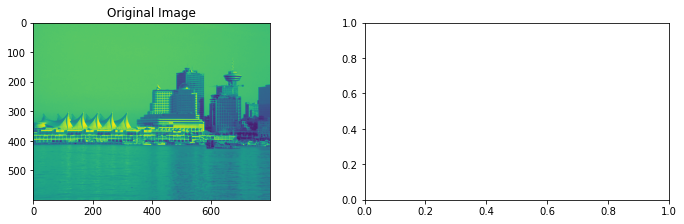

In [1]:
%matplotlib inline
from skimage import exposure
from imageio import imread
import matplotlib.pyplot as plt

img = imread('images/canada.png', pilmode='L')

img_he = exposure.equalize_hist(img)
img_ahe = exposure.equalize_adapthist(img, clip_limit = 1)
img_clahe = exposure.equalize_adapthist(img)
# YOUR CODE HERE

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 1))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 1))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 1))

plt.show()

## Assignment 4: Colormaps[5 Points]

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

YOUR ANSWER HERE

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-04, slide 35):

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

color = []

# The following is just for demonstration: replace and extend by your own examples
color.append(np.asarray((lambda x: np.sin(x/256*2*np.pi)*128+128, 
              lambda x: (x//16) * 16,
              lambda x: (2*x) % 256)))
# YOUR CODE HERE

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i in range(len(color)):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[i][0](gray), 'red')
    plt.plot(gray, color[i][1](gray), 'green')
    plt.plot(gray, color[i][2](gray), 'blue')
    plt.imshow(np.stack([color[i][0](a),color[i][1](a),color[i][2](a)],axis=2)/256, origin='lower')
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  g ^ \gamma + a \begin{pmatrix}0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \theta \\ \sin \theta\end{pmatrix}$$
with $\theta = 2 \pi (\frac{\text{start_color }}{3} + \text{rotations}\cdot g)$ and $ a = \frac{\gamma\cdot\text{hue}\cdot g\cdot( 1 - \gamma g)}{2}$ (with 'start_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

In [ ]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

start_color = 1
rotations = 3
hue = 2
gamma = 1
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: 
        lookup_table (ndarray): The cube helix color map. (256,3)
    """
    lookup_table = np.empty((256,3), float)
    
    for i in np.arange(256):
        # YOUR CODE HERE
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Args:
        img (ndarray): The image (ndim=2).
        lookup_table (ndarray): The lookup table (shape=(256,3)).
        
    Return:
        color_img (ndarray): The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [ ]:
# This code was taken from 
# https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap
    
    Args:
        cmap (ndarray): RGB Colormap.
    
    Returns:
        (ndarray): Gray Colormap.
    
    """
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    """Plots RGB colormap and grayified colormap
    
    Args: 
        cmap (ndarray): Colormap.
    
    """
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    
# printing the jet colormap and how it would look like if printed black and white
show_colormap('jet')

# doing the same for cube helix
show_colormap('cubehelix')


YOUR ANSWER HERE